In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
import keras
import numpy as np
from keras.models import load_model
from keras_preprocessing.image import ImageDataGenerator
from keras_preprocessing.image import img_to_array
from keras_preprocessing.image import load_img
model = load_model('/content/drive/MyDrive/ml-projects/lung-cancer-detection/Trained Model/model_version3.hdf5')

In [ ]:
print(tf. __version__) 
print(keras.__version__)

2.9.2
2.9.0


Found 315 images belonging to 4 classes.
1/1 [==============================] - 2s 2s/step


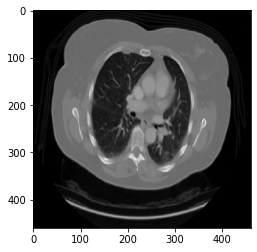

This image most likely belongs to adenocarcinoma with a 91.88 percent confidence.


In [ ]:
img_path = "/content/drive/MyDrive/Data/test/adenocarcinoma/000109 (2).png"
image_shape = (305,430,3)
N_CLASSES = 4
BATCH_SIZE = 32
test_path="/content/drive/MyDrive/Data/test"
test_datagen = ImageDataGenerator(dtype='float32', rescale = 1.0/255.0)
test_generator = test_datagen.flow_from_directory(test_path,
                                                   batch_size = 1,
                                                   target_size = (305,430),
                                                   class_mode = 'categorical')
class_names=list(test_generator.class_indices.keys())
img = load_img(img_path, target_size=(460, 460))
img_array = img_to_array(img)
img_array = np.expand_dims(img_array, 0)

prediction = model.predict(img_array)
imgplot = plt.imshow(img)
plt.show()
print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(prediction)], 100 * np.max(prediction))
)